# Analysis on Bank Marketing Dataset

Business Problem: Based on previous marketing campaigns, how should a financial instituion target audience for increased subscription for term deposit.

## Topic of Contents:
* [Understanding Data](#first-bullet)
* [Basic Data Analysis](#second-bullet)
* [Effects of banking data on Term Deposit](#third-bullet)
* [Effect of Campaign on Term Deposit](#four-bullet)
* [Additional Attribute Effects](#five-bullet)
* [Data Preprocessing](#six-bullet)
* [Data Modelling](#seven-bullet)
* [Model Analysis](#eight-bullet)
* [Results](#nine-bullet)
* [Future Leads to Marketing Campaigns](#ten-bullet)


## Understanding Data <a class="anchor" id="first-bullet"></a>

## Basic Data Analysis <a class="anchor" id="second-bullet"></a>

In [1]:
# import basic libraries
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [204]:
path = 'C:/Users/MANEET/bank_marketing'
data_add = '/data'
report_add = '/report'
figures_add = '/figures'

In [244]:
df = pd.read_csv(path + data_add +'./raw/bank-additional-full.csv', delimiter = ';')

In [245]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [243]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_zipped_file
profile = ProfileReport(
        df, title="Profile Report of the UCI Bank Marketing Dataset", explorative=True
    )

In [10]:
from pathlib import Path
profile.to_file(Path("uci_bank_marketing_report.html"))

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

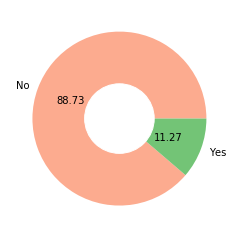

In [172]:
labels = ['No','Yes']
cmap1 = plt.cm.Reds
cmap2 = plt.cm.Greens
colors = [cmap1(0.3),cmap2(0.5)]
plt.pie(df["y"].value_counts(), labels = labels, colors = colors ,autopct="%.2f")
# add a white circle at the center
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

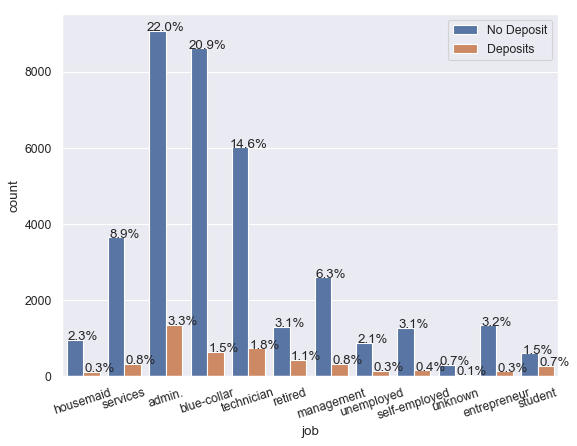

In [200]:
# sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 6), dpi=80)
ax = sns.countplot(x = "job", hue = 'y', data = df)
plt.xticks(rotation=18)
plt.legend(["No Deposit", "Deposits"])
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()


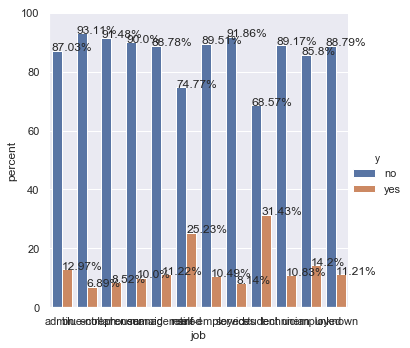

<Figure size 720x576 with 0 Axes>

In [226]:

x,y = 'job','y'
df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)


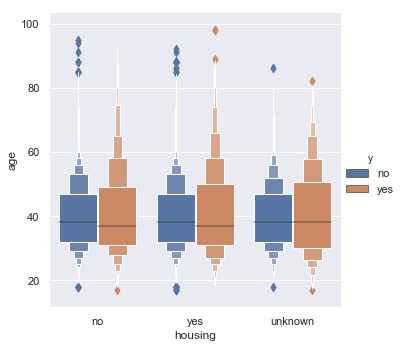

In [237]:
sns.catplot(x = "housing", y ='age', hue = 'y', kind = 'boxen', data = df)

## Effects of banking data on Term Deposit <a class="anchor" id="third-bullet"></a>

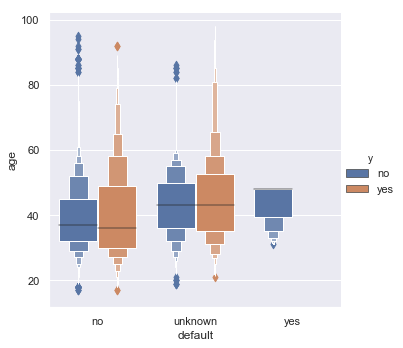

In [234]:
sns.catplot(x = "default", y ='age', hue = 'y', kind = 'boxen', data = df)

## Effect of Campaign on Term Deposit <a class="anchor" id="four-bullet"></a>

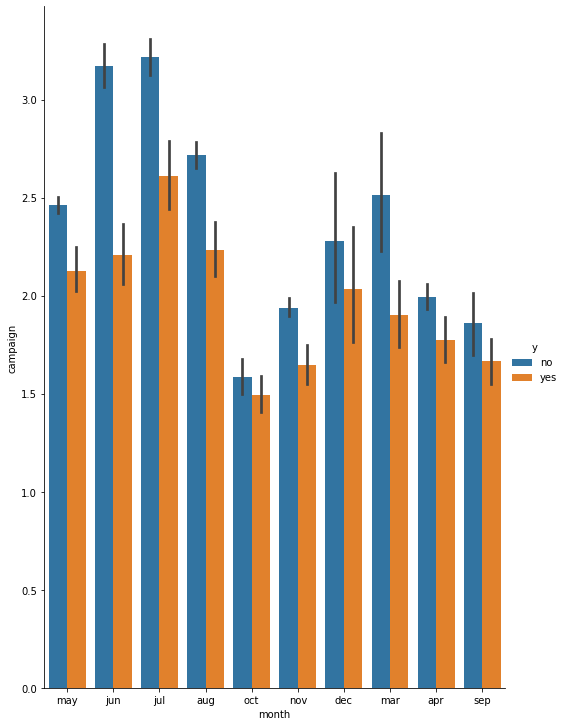

In [233]:
g = sns.catplot(x="month", y="campaign",
                hue="y",
                data=df, kind="bar",
                height=10, aspect=.7)

In [25]:
x = job + education y =  age hue deposit

In [249]:
df.head()
# married + education versus count 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


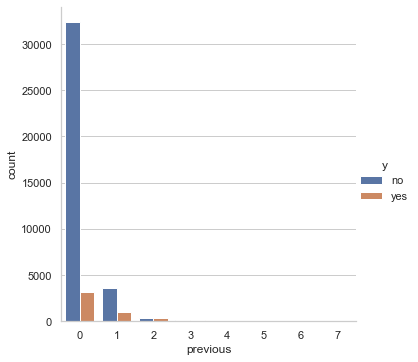

In [258]:
g = sns.catplot(x="previous",
                hue="y",kind = 'count',
                data=df)

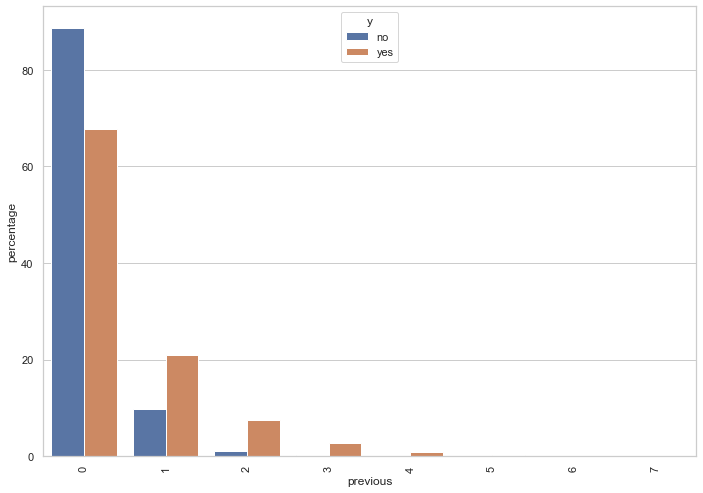

In [259]:
occupation_counts = (df.groupby(['y'])['previous']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('previous'))
p = sns.barplot(x="previous", y="percentage", hue="y", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

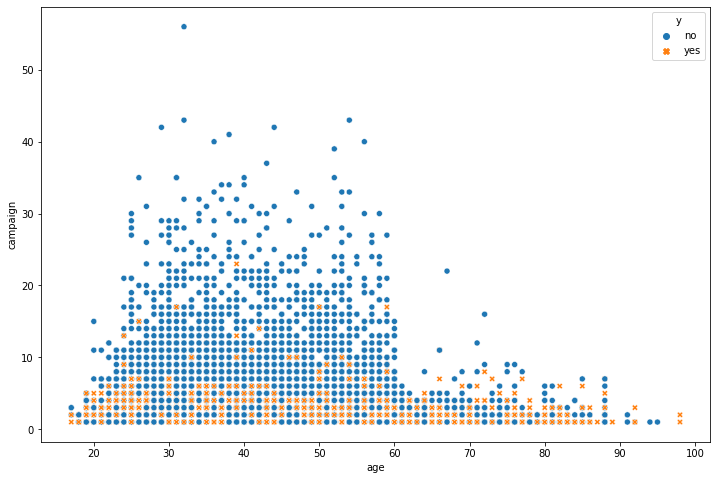

In [237]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(12, 8)
fig = sns.scatterplot(data = df,x = "age",y = 'campaign', hue = "y", style = 'y')
# plt.legend(["No Deposit", "Deposits"])
plt.show()

## Additional Attribute Effects <a class="anchor" id="five-bullet"></a>

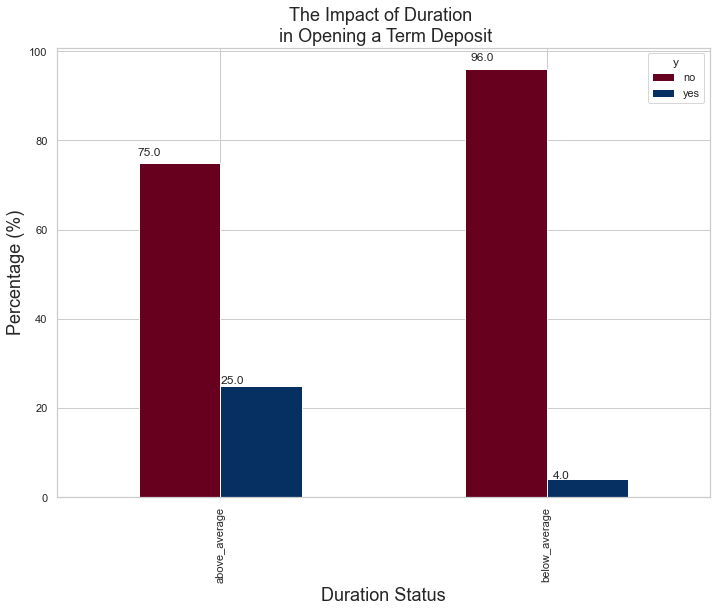

In [241]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('whitegrid')
avg_duration = df['duration'].mean()

lst = [df]
df["duration_status"] = np.nan

for col in lst:
    col.loc[col["duration"] < avg_duration, "duration_status"] = "below_average"
    col.loc[col["duration"] > avg_duration, "duration_status"] = "above_average"
    
pct_term = pd.crosstab(df['duration_status'], df['y']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)


ax = pct_term.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Impact of Duration \n in Opening a Term Deposit", fontsize=18)
plt.xlabel("Duration Status", fontsize=18);
plt.ylabel("Percentage (%)", fontsize=18)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    

plt.show()

In [274]:
df.loan.value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

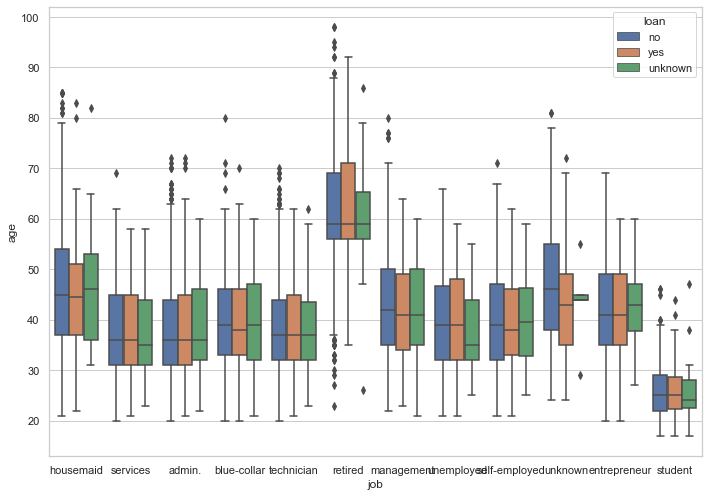

In [282]:
ax = sns.boxplot(df.job,y = df.age, hue = df.loan)

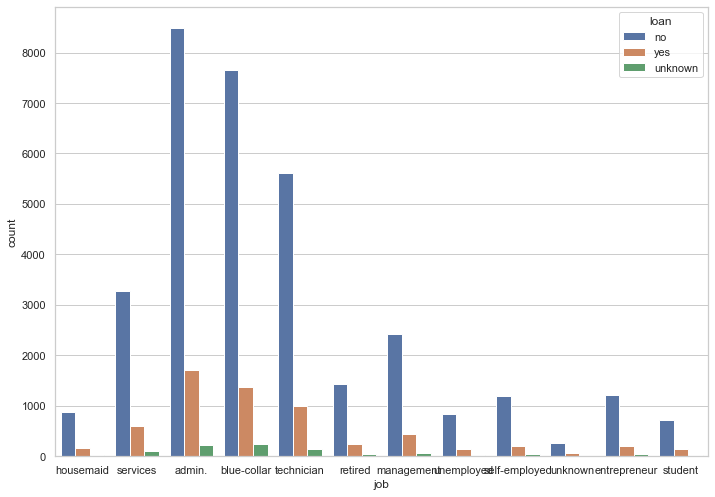

In [290]:
ax = sns.countplot(x = df.job, hue=df.loan)

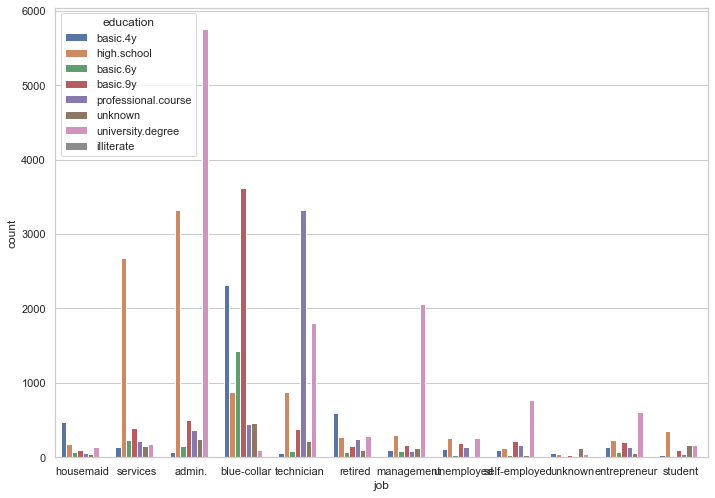

In [291]:
ax = sns.countplot(x = df.job, hue=df.education)

In [294]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [298]:
df['emp.var.rate'].unique()

array([ 1.1,  1.4, -0.1, -0.2, -1.8, -2.9, -3.4, -3. , -1.7, -1.1])

## Data Preprocessing <a class="anchor" id="six-bullet"></a>

In [4]:
train_df = df.loc[:,df.columns !='y']
target_df = df.loc[:,df.columns == 'y']

In [8]:
def find_cat_cols(df):
    num_cols = list(df._get_numeric_data().columns)
    cat_cols = list(set(df.columns) - set(num_cols))
    print("Found {0} Numerical columns in DataFrame".format(len(num_cols)))
    print("Found {0} Categorical columns in DataFrame".format(len(cat_cols)))
    return num_cols, cat_cols
    

In [9]:
numeric_features, categorical_features = find_cat_cols(train_df)

Found 10 Numerical columns in DataFrame
Found 10 Categorical columns in DataFrame


In [15]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV

In [22]:
df_copy = df

In [30]:
df = df_copy

In [31]:
scaler = StandardScaler()
label_encoder = LabelEncoder()
df[numeric_features] = scaler.fit_transform(df[numeric_features])
df['deposit'] = label_encoder.fit_transform(df['y'])
df = pd.concat([df,pd.get_dummies(df[categorical_features])],axis=1)
df.drop(labels = categorical_features,axis=1,inplace=True)
df.drop(labels = "y",axis=1,inplace = True)
# df.to_csv(path + data_add + './processed/processed_data.csv')

In [41]:
processed_df = df

In [78]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import train_test_split, GridSearchCV

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

preprocess_pipeline = FeatureUnion(transformer_list=[
        ("numerical_pipeline", numeric_transformer),
        ("categorical_pipeline", categorical_transformer)])


In [79]:
processed_df = preprocess_pipeline.fit_transform(df_copy)
processed_df

ValueError: could not convert string to float: 'housemaid'

In [58]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

oversample = RandomOverSampler(sampling_strategy='minority')
X_over,y_over = oversample.fit_resample(train_df,target_df)

In [59]:

undersample = RandomUnderSampler(sampling_strategy='majority')
X_under,y_under = undersample.fit_resample(train_df,target_df)

In [61]:
print('Undersampled dataset shape %s' % len(X_under))

Undersampled dataset shape 9280


In [73]:
def find_cat_cols(df):
    num_cols = list(df._get_numeric_data().columns)
    cat_cols = list(set(df.columns) - set(num_cols))
    print("Found {0} Numerical columns in DataFrame".format(len(num_cols)))
    print("Found {0} Categorical columns in DataFrame".format(len(cat_cols)))
    return num_cols, cat_cols
    

In [142]:
def preprocess_data(X,y):
    numeric_features, categorical_features = find_cat_cols(X)
    scaler = StandardScaler()
    label_encoder = LabelEncoder()
    X[numeric_features] = scaler.fit_transform(X[numeric_features])
    y_preprocessed = pd.Series(label_encoder.fit_transform(y))
    X_preprocessed = pd.concat([X,pd.get_dummies(X[categorical_features])],axis=1)
    X_preprocessed.drop(labels = categorical_features,axis=1,inplace=True)
    # df.to_csv(path + data_add + './processed/processed_data.csv')
    return X_preprocessed.values, y_preprocessed.values

In [164]:
X_over_preprocessed, y_over_preprocessed = preprocess_data(X_over,y_over)
print(X_over_preprocessed.shape, y_over_preprocessed.shape)

Found 10 Numerical columns in DataFrame
Found 10 Categorical columns in DataFrame
(73096, 63) (73096,)


In [160]:
X_under_preprocessed,y_under_preprocessed = preprocess_data(X_under,y_under)
print(X_under_preprocessed.shape, y_under_preprocessed.shape)

Found 10 Numerical columns in DataFrame
Found 10 Categorical columns in DataFrame
(9280, 62) (9280,)


In [165]:
X_raw_preprocessed,y_raw_preprocessed = preprocess_data(train_df,target_df)
print(X_raw_preprocessed.shape,y_raw_preprocessed.shape)

Found 10 Numerical columns in DataFrame
Found 10 Categorical columns in DataFrame
(41188, 63) (41188,)


## Data Modelling <a class="anchor" id="seven-bullet"></a>

In [81]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


dict_classifiers = {
    "Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=20),
    "Gradient Boosting Classifier": GradientBoostingClassifier()
}


In [175]:
no_classifiers = len(dict_classifiers.keys())
from sklearn.model_selection import cross_val_score
def cv_model(X_train,Y_train,verbose = True):
    df_results = pd.DataFrame()
    count = 0
    for key, classifier in dict_classifiers.items():
        t_start = time.clock()
        cross_val = cross_val_score(classifier,X_train, Y_train, cv = 3)
        t_end = time.clock()
        t_diff = t_end - t_start
        df_results.loc[count,'Classifier'] = key
        df_results.loc[count,'Total_time'] = t_diff
        df_results.loc[count,'Cross Val Mean Score'] = cross_val.mean()
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=t_diff))
        count+=1
    return df_results

In [176]:
cv_raw_results = cv_model(X_raw_preprocessed,y_raw_preprocessed)

trained Nearest Neighbors in 36.85 s
trained Decision Tree in 1.21 s
trained Random Forest in 2.28 s
trained Gradient Boosting Classifier in 38.79 s


In [183]:
cv_raw_results = cv_raw_results.sort_values(by='Cross Val Mean Score', ascending=False)
print(cv_raw_results)

                     Classifier  Total_time  Cross Val Mean Score
3  Gradient Boosting Classifier   38.787322              0.591767
0             Nearest Neighbors   36.850763              0.568993
1                 Decision Tree    1.206188              0.406854
2                 Random Forest    2.283572              0.403212


In [186]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X_raw_preprocessed, y_raw_preprocessed, test_size=0.20)
best_clf = dict_classifiers.get(cv_raw_results.Classifier.iloc[0])
best_clf.fit(X_train,y_train)
y_pred = best_clf.predict(X_test)
print(f1_score(y_test,y_pred))

NameError: name 'f1_score_score' is not defined

In [188]:
cv_under_results = cv_model(X_under_preprocessed,y_under_preprocessed)

trained Nearest Neighbors in 3.08 s
trained Decision Tree in 0.44 s
trained Random Forest in 0.86 s
trained Gradient Boosting Classifier in 9.90 s


In [189]:
cv_under_results = cv_under_results.sort_values(by='Cross Val Mean Score', ascending=False)
print(cv_under_results)

                     Classifier  Total_time  Cross Val Mean Score
0             Nearest Neighbors    3.077871              0.576520
1                 Decision Tree    0.442369              0.466165
3  Gradient Boosting Classifier    9.898884              0.464549
2                 Random Forest    0.864834              0.453017


In [190]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X_under_preprocessed, y_under_preprocessed, test_size=0.20)
best_clf = dict_classifiers.get(cv_raw_results.Classifier.iloc[0])
best_clf.fit(X_train,y_train)
y_pred = best_clf.predict(X_test)
print(f1_score(y_test,y_pred))

0.8425026968716289


In [192]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,y_pred))

[[783 129]
 [163 781]]


In [193]:
cv_over_results = cv_model(X_over_preprocessed,y_over_preprocessed)

trained Nearest Neighbors in 156.05 s
trained Decision Tree in 3.34 s
trained Random Forest in 5.59 s
trained Gradient Boosting Classifier in 95.37 s


In [194]:
cv_over_results = cv_over_results.sort_values(by='Cross Val Mean Score', ascending=False)
print(cv_over_results)

                     Classifier  Total_time  Cross Val Mean Score
3  Gradient Boosting Classifier   95.370102              0.689106
0             Nearest Neighbors  156.045008              0.603508
1                 Decision Tree    3.338608              0.575135
2                 Random Forest    5.589192              0.553519


In [200]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
X_train, X_test, y_train, y_test = train_test_split(X_over_preprocessed, y_over_preprocessed, test_size=0.20)
best_clf = dict_classifiers.get(cv_raw_results.Classifier.iloc[0])
best_clf.fit(X_train,y_train)
y_pred = best_clf.predict(X_test)
print(metrics.confusion_matrix(y_test,y_pred))

AttributeError: module 'sklearn.metrics' has no attribute 'confusion_matrixion_matrix'

In [201]:
print(metrics.confusion_matrix(y_test,y_pred))

[[6173 1155]
 [ 497 6795]]


In [84]:
df_results = batch_classify(X_over_preprocessed, y_over_preprocessed)
print(df_results.sort_values(by='train_score', ascending=False))

trained Nearest Neighbors in 0.11 s
trained Decision Tree in 1.74 s
trained Random Forest in 2.30 s
trained Gradient Boosting Classifier in 24.17 s
                     classifier  train_score  training_time
1                 Decision Tree     1.000000       1.737510
2                 Random Forest     0.999863       2.295488
0             Nearest Neighbors     0.950367       0.107695
3  Gradient Boosting Classifier     0.894769      24.172155


In [95]:
df_results = cv_model(X_over_preprocessed, y_over_preprocessed)

trained Nearest Neighbors in 119.07 s
trained Decision Tree in 2.78 s
trained Random Forest in 3.98 s
trained Gradient Boosting Classifier in 43.92 s


In [106]:
df_over_results

,classifier,train_score,training_time,Cross Val Mean Score
0,Nearest Neighbors,0.950367,119.066174,0.603508
1,Decision Tree,1.000000,2.779594,0.575518
2,Random Forest,0.999863,3.984493,0.557459
3,Gradient Boosting Classifier,0.894769,43.920332,0.689106


In [157]:
df_under_results_train = batch_classify(X_under_pro, y_under_pro)
print(df_under_results_train.sort_values(by='train_score', ascending=False))

trained Nearest Neighbors in 0.00 s
trained Decision Tree in 0.10 s
trained Random Forest in 0.32 s
trained Gradient Boosting Classifier in 2.86 s
                     classifier  train_score  training_time
1                 Decision Tree     1.000000       0.102767
2                 Random Forest     0.997522       0.323843
3  Gradient Boosting Classifier     0.894720       2.864192
0             Nearest Neighbors     0.888470       0.003476


In [158]:
under_df_results = cv_model(X_train= X_under_pro,Y_train = y_under_pro)

trained Nearest Neighbors in 2.08 s
trained Decision Tree in 0.22 s
trained Random Forest in 0.61 s
trained Gradient Boosting Classifier in 5.94 s


In [159]:
under_df_results

,classifier,training_time,Cross Val Mean Score
0,Nearest Neighbors,2.078612,0.576520
1,Decision Tree,0.218020,0.459591
2,Random Forest,0.610989,0.450323
3,Gradient Boosting Classifier,5.942168,0.464333


In [148]:
df_raw_results_train = batch_classify(X_raw_processed, y_raw_processed)
print(df_raw_results_train.sort_values(by='train_score', ascending=False))

trained Nearest Neighbors in 0.01 s
trained Decision Tree in 0.71 s
trained Random Forest in 1.10 s
trained Gradient Boosting Classifier in 11.53 s
                     classifier  train_score  training_time
1                 Decision Tree     1.000000       0.705930
2                 Random Forest     0.997669       1.103161
0             Nearest Neighbors     0.928620       0.014837
3  Gradient Boosting Classifier     0.921919      11.532713


In [152]:
raw_df_results = cv_model(X_raw_processed, y_raw_processed)

trained Nearest Neighbors in 33.02 s
trained Decision Tree in 1.11 s
trained Random Forest in 2.05 s
trained Gradient Boosting Classifier in 35.19 s


In [153]:
raw_df_results

,classifier,train_score,training_time,Cross Val Mean Score
0,Nearest Neighbors,0.0,33.020491,0.568993
1,Decision Tree,0.0,1.114970,0.381266
2,Random Forest,0.0,2.048328,0.432275
3,Gradient Boosting Classifier,0.0,35.185383,0.591767


##  Model Analysis <a class="anchor" id="eight-bullet"></a>

## Results <a class="anchor" id="nine-bullet"></a>

## Future Leads to Marketing Campaigns <a class="anchor" id="ten-bullet"></a>

## Analysis of banking Attributes <a class="anchor" id="second-bullet"></a>

In [43]:
import pandas as pd

In [140]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [143]:
df.shape

(41188, 21)

In [144]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [147]:
import matplotlib.pyplot as plt

In [149]:
# only 11.70 % customer agreed to subscribe to a term deposit 

In [150]:
# lets look other variables
df.age.max()

98

In [151]:
df['bin'] = pd.cut(df['age'], bins=range(18,98,10), labels=[f'{l}-{l+10}' for l in range(18,88,10)])

In [153]:
df.bin.head()

0    48-58
1    48-58
2    28-38
3    38-48
4    48-58
Name: bin, dtype: category
Categories (7, object): [18-28 < 28-38 < 38-48 < 48-58 < 58-68 < 68-78 < 78-88]

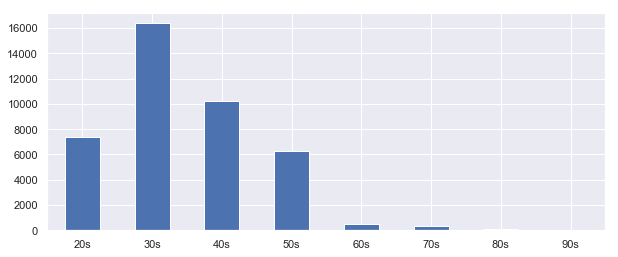

In [254]:
import matplotlib.pyplot as plt
out = pd.cut(df.age, bins=[18, 30, 40, 50, 60, 70, 80, 90, 100], include_lowest=True)
ax = out.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,4))
ax.set_xticklabels(['20s','30s','40s','50s','60s','70s','80s','90s'])
plt.show()

In [127]:
x = df.groupby('y').age

In [131]:
x.get_group("yes").values

array([59, 56, 41, ..., 51, 71, 72], dtype=int64)

In [104]:
grouped_df = df.groupby('y')


In [109]:
yes_age = grouped_df.get_group("yes").age.values
no_age = grouped_df.get_group("no").age.values

array([59, 56, 41, ..., 51, 71, 72], dtype=int64)

In [112]:
age_counts = df.age.value_counts()
fig = plt.bar(age_counts, title="Age of respondents")
fig.update_layout(
    xaxis_title = "Age",
    yaxis_title = "Frequency",
    title_x = 0.5, 
    showlegend = False
)
fig.show()

TypeError: bar() missing 1 required positional argument: 'height'

In [247]:
import seaborn as sns
plt = sns.barplot(x='education', y='balance', hue ='y')

ValueError: Could not interpret input 'education'

In [248]:
sns.scatterplot(data=df, x="age", y="balance", hue="y")


ValueError: Could not interpret input 'balance'

In [4]:
num_cols = df._get_numeric_data().columns

In [5]:
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [6]:
cat_cols = list(set(df.columns) - set(num_cols))
print(cat_cols)

['education', 'contact', 'housing', 'deposit', 'poutcome', 'marital', 'month', 'loan', 'default', 'job']


In [7]:
def find_cat_cols(df):
    num_cols = list(df._get_numeric_data().columns)
    cat_cols = list(set(df.columns) - set(num_cols))
    print("Found {0} Numerical columns in DataFrame".format(len(num_cols)))
    print("Found {0} Categorical columns in DataFrame".format(len(cat_cols)))
    return num_cols, cat_cols
    

In [8]:
num_cols,cat_cols = find_cat_cols(df)

Found 7 Numerical columns in DataFrame
Found 10 Categorical columns in DataFrame


In [9]:
num_cols

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [10]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


In [11]:
corr = df.corr()

In [12]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

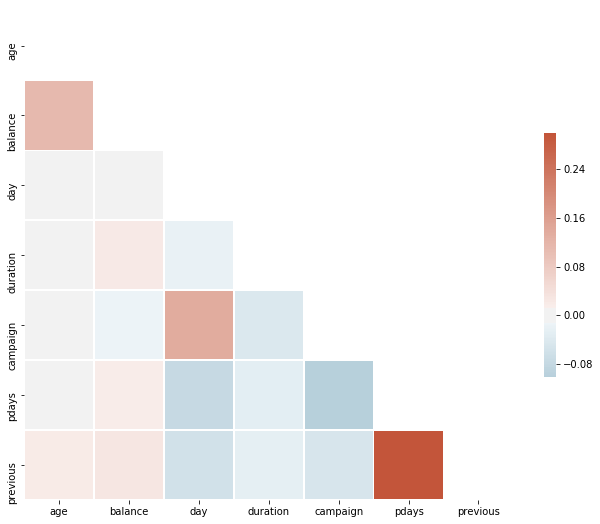

In [13]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})